In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/My Drive/Colab Notebooks/"
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize
seed_value=60
np.random.seed(seed_value)
random.seed(seed_value)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epsilon: 0.001, Accuracy: 39.7489
Epsilon: 0.01, Accuracy: 74.1579
Epsilon: 0.1, Accuracy: 86.5990
Epsilon: 1, Accuracy: 91.1888


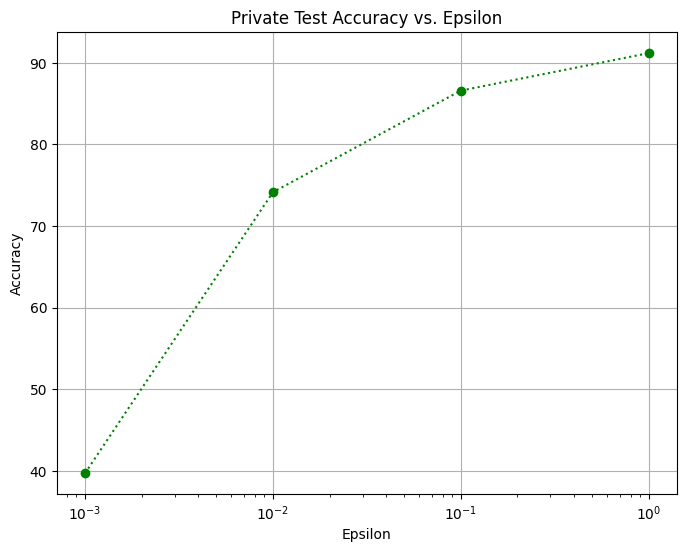

In [2]:
# Logistic Regression with L2 Norm

class LogisticRegressionWithL2Norm:
  @staticmethod
  def loss(theta,x,y,lambda_param=None):
    n=x.shape[0]
    z=x.dot(theta.T)
    z=np.clip(z,-500,500)
    regularization=lambda_param/2*np.linalg.norm(theta,ord=2)**2
    objective_function=np.sum(np.log(1+np.exp(-y*z)))/n+regularization
    return objective_function

  @staticmethod
  def gradient(theta,x,y,lambda_param=None):
    n=x.shape[0]
    z=x.dot(theta.T)
    z=np.clip(z,-500,500)
    regularization=lambda_param*theta
    grad=-(np.transpose(x)@(y/(1+np.exp(y*z))))/n+regularization
    return grad

def predict_labels(weights, features):
    predictions=np.sign(features.dot(weights))
    predictions[predictions==0]=1
    return predictions

def train_logistic_regression_model(features, labels, regularization_param):
    initial_weights=np.zeros(features.shape[1])
    optimization_result=minimize(fun=LogisticRegressionWithL2Norm.loss,x0=initial_weights,args=(features, labels, regularization_param),jac=LogisticRegressionWithL2Norm.gradient,method='L-BFGS-B')
    return optimization_result.x


X_data=np.load(data_path+"kddcup99_processed_x.npy", allow_pickle=True).astype(float)
Y_data=np.load(data_path+"kddcup99_processed_y.npy", allow_pickle=True).astype(float)

Y_data=(Y_data>0).astype(int)*2-1
n_samples=X_data.shape[0]
indices=np.random.permutation(n_samples)
X_data=X_data[indices]
Y_data=Y_data[indices]

n_samples=X_data.shape[0]
train_size=int(n_samples*(2/3))

train_features=X_data[:train_size]
train_labels=Y_data[:train_size]

test_features=X_data[train_size:]
test_labels=Y_data[train_size:]

L_max=1
regularization_param=0.01
laplace_sensitivity=2*L_max/(train_features.shape[0]*regularization_param)

optimized_weights=train_logistic_regression_model(train_features, train_labels, regularization_param)

epsilon_values=[0.001, 0.01, 0.1, 1]
private_accuracies=[]

for epsilon in epsilon_values:
    noise_scale=laplace_sensitivity/epsilon
    noise=np.random.laplace(loc=0, scale=noise_scale, size=optimized_weights.shape)
    noisy_weights=optimized_weights+noise
    predictions=predict_labels(noisy_weights, test_features)
    accuracy=np.mean(predictions==test_labels)*100
    private_accuracies.append(accuracy)
    print(f"Epsilon: {epsilon}, Accuracy: {accuracy:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(epsilon_values, private_accuracies, marker='o', linestyle=':',color='g')
plt.xscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Private Test Accuracy vs. Epsilon')
plt.grid(True)
plt.show()

<ipython-input-2-621ed481c5f7>:7: RuntimeWarning: overflow encountered in exp
  return np.sum(np.log(1 + np.exp(exponent))) / x.shape[0]
<ipython-input-2-621ed481c5f7>:12: RuntimeWarning: overflow encountered in exp
  gradient_loss = - (np.transpose(x) @ (y / (1 + np.exp(exponent)))) / x.shape[0]


Epsilon: 0.001, Accuracy: 39.7317
Epsilon: 0.01, Accuracy: 74.1150
Epsilon: 0.1, Accuracy: 64.7339
Epsilon: 1, Accuracy: 8.8026


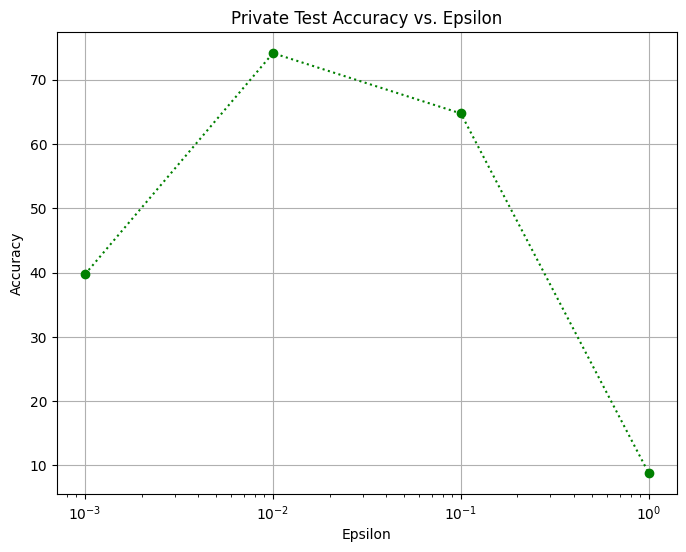

In [2]:
# Logistic Regression without L2 Norm

class LogisticRegression():
    @staticmethod
    def loss(theta, x, y, lambda_param=None):
        exponent = - y * (x.dot(theta))
        return np.sum(np.log(1 + np.exp(exponent))) / x.shape[0]

    @staticmethod
    def gradient(theta, x, y, lambda_param=None):
        exponent = y * (x.dot(theta))
        gradient_loss = - (np.transpose(x) @ (y / (1 + np.exp(exponent)))) / x.shape[0]
        gradient_loss = gradient_loss.reshape(theta.shape)
        return gradient_loss

def predict_labels(weights, features):
    predictions=np.sign(features.dot(weights))
    predictions[predictions==0]=1
    return predictions

def train_logistic_regression_model(features, labels, regularization_param):
    initial_weights=np.zeros(features.shape[1])
    optimization_result=minimize(fun=LogisticRegression.loss,x0=initial_weights,args=(features, labels, regularization_param),jac=LogisticRegression.gradient,method='L-BFGS-B')
    return optimization_result.x


X_data=np.load(data_path+"kddcup99_processed_x.npy", allow_pickle=True).astype(float)
Y_data=np.load(data_path+"kddcup99_processed_y.npy", allow_pickle=True).astype(float)

Y_data=(Y_data>0).astype(int)*2-1
n_samples=X_data.shape[0]
indices=np.random.permutation(n_samples)
X_data=X_data[indices]
Y_data=Y_data[indices]

n_samples=X_data.shape[0]
train_size=int(n_samples*(2/3))

train_features=X_data[:train_size]
train_labels=Y_data[:train_size]

test_features=X_data[train_size:]
test_labels=Y_data[train_size:]

L_max=1
regularization_param=0.01
laplace_sensitivity=2*L_max/(train_features.shape[0]*regularization_param)

optimized_weights=train_logistic_regression_model(train_features, train_labels, regularization_param)

epsilon_values=[0.001, 0.01, 0.1, 1]
private_accuracies=[]

for epsilon in epsilon_values:
    noise_scale=laplace_sensitivity/epsilon
    noise=np.random.laplace(loc=0, scale=noise_scale, size=optimized_weights.shape)
    noisy_weights=optimized_weights+noise
    predictions=predict_labels(noisy_weights, test_features)
    accuracy=np.mean(predictions==test_labels)*100
    private_accuracies.append(accuracy)
    print(f"Epsilon: {epsilon}, Accuracy: {accuracy:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(epsilon_values, private_accuracies, marker='o', linestyle=':',color='g')
plt.xscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Private Test Accuracy vs. Epsilon')
plt.grid(True)
plt.show()

<ipython-input-3-e35bdcb2540a>:7: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(exponent))
<ipython-input-3-e35bdcb2540a>:14: RuntimeWarning: overflow encountered in exp
  return - (yi*xi) / (1+np.exp(exponent))


Epsilon: 0.001, Accuracy: 31.9277
Epsilon: 0.01, Accuracy: 96.4130
Epsilon: 0.1, Accuracy: 62.4496
Epsilon: 1, Accuracy: 89.8217


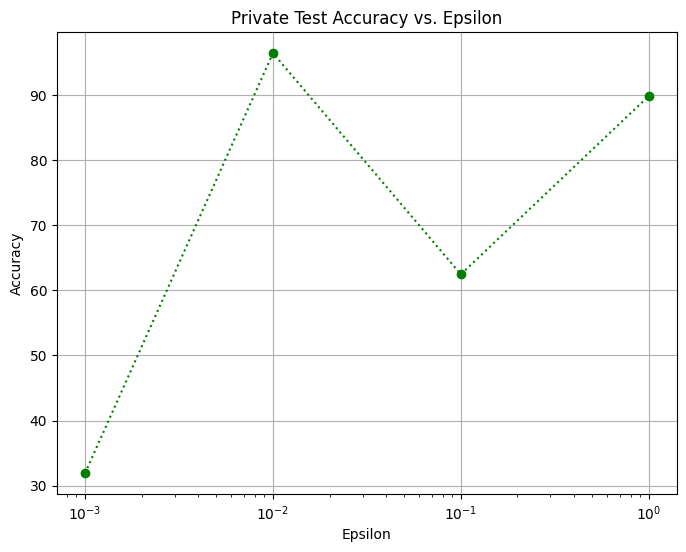

In [3]:
# Logistic Regression at Single Point (Per Sample)

class LogisticRegressionSinglePoint():
    @staticmethod
    def loss(theta, xi, yi, lambda_param=None):
        exponent = - yi * (xi.dot(theta))
        return np.log(1 + np.exp(exponent))

    @staticmethod
    def gradient(theta, xi, yi, lambda_param=None):
        # Based on page 22 of
        # http://www.cs.rpi.edu/~magdon/courses/LFD-Slides/SlidesLect09.pdf
        exponent = yi * (xi.dot(theta))
        return - (yi*xi) / (1+np.exp(exponent))

def compute_loss(weights, features, labels, regularization_param=None):
    return np.mean([LogisticRegressionSinglePoint.loss(weights, features[i], labels[i], regularization_param) for i in range(len(labels))])

def compute_gradient(weights, features, labels, regularization_param=None):
    gradients = np.mean([LogisticRegressionSinglePoint.gradient(weights, features[i], labels[i], regularization_param) for i in range(len(labels))], axis=0)
    return gradients.reshape(weights.shape)

def predict_labels(weights, features):
    predictions=np.sign(features.dot(weights))
    predictions[predictions==0]=1
    return predictions

def train_logistic_regression_model(features, labels, regularization_param):
    initial_weights=np.zeros(features.shape[1])
    optimization_result=minimize(fun=compute_loss,x0=initial_weights,args=(features, labels, regularization_param),jac=compute_gradient,method='L-BFGS-B')
    return optimization_result.x


X_data=np.load(data_path+"kddcup99_processed_x.npy", allow_pickle=True).astype(float)
Y_data=np.load(data_path+"kddcup99_processed_y.npy", allow_pickle=True).astype(float)

Y_data=(Y_data>0).astype(int)*2-1
n_samples=X_data.shape[0]
indices=np.random.permutation(n_samples)
X_data=X_data[indices]
Y_data=Y_data[indices]

n_samples=X_data.shape[0]
train_size=int(n_samples*(2/3))

train_features=X_data[:train_size]
train_labels=Y_data[:train_size]

test_features=X_data[train_size:]
test_labels=Y_data[train_size:]

L_max=1
regularization_param=0.01
laplace_sensitivity=2*L_max/(train_features.shape[0]*regularization_param)

optimized_weights=train_logistic_regression_model(train_features, train_labels, regularization_param)

epsilon_values=[0.001, 0.01, 0.1, 1]
private_accuracies=[]

for epsilon in epsilon_values:
    noise_scale=laplace_sensitivity/epsilon
    noise=np.random.laplace(loc=0, scale=noise_scale, size=optimized_weights.shape)
    noisy_weights=optimized_weights+noise
    predictions=predict_labels(noisy_weights, test_features)
    accuracy=np.mean(predictions==test_labels)*100
    private_accuracies.append(accuracy)
    print(f"Epsilon: {epsilon}, Accuracy: {accuracy:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(epsilon_values, private_accuracies, marker='o', linestyle=':',color='g')
plt.xscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Private Test Accuracy vs. Epsilon')
plt.grid(True)
plt.show()

<ipython-input-4-862efa5e8dd1>:8: RuntimeWarning: overflow encountered in exp
  return np.sum(np.log(1+np.exp(exponent))) / x.shape[0]
<ipython-input-4-862efa5e8dd1>:20: RuntimeWarning: overflow encountered in exp
  gradient_loss = - (x.T @ (y / (1 + np.exp(exponent)))) / x.shape[0]


Epsilon: 0.001, Accuracy: 35.2790
Epsilon: 0.01, Accuracy: 31.2505
Epsilon: 0.1, Accuracy: 60.6711
Epsilon: 1, Accuracy: 41.4845


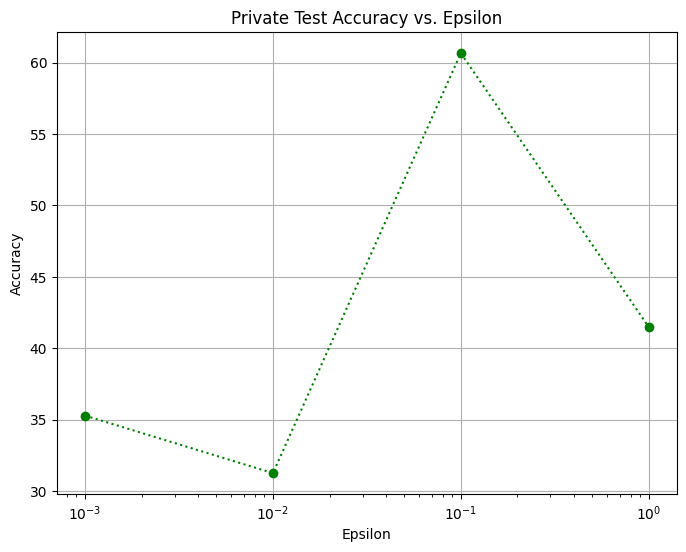

In [4]:
# Logistic Regression with Explicit L2 regularization - Ridge Regression

class LogisticRegression():
    @staticmethod
    def loss(theta, x, y, lambda_param=None):
        #Loss function for logistic regression with without regularization
        exponent = - y * (x.dot(theta))
        return np.sum(np.log(1+np.exp(exponent))) / x.shape[0]

    @staticmethod
    def gradient(theta, x, y, lambda_param=None):
        x = x.reshape(1, -1) if x.ndim == 1 else x  # Reshape if it's 1D for a single sample
        # Ensure y is a scalar (for single sample) or a 1D array for multiple samples
        y = np.array(y).reshape(-1)  # Flatten y in case it's a scalar
        exponent = y * (x.dot(theta))
        #gradient_loss = - (np.transpose(x) @ (y / (1+np.exp(exponent)))) / (x.shape[0])
        #print(x.shape)
        #print(y.shape)
        #print(theta.shape)
        gradient_loss = - (x.T @ (y / (1 + np.exp(exponent)))) / x.shape[0]
        # Reshape to handle case where x is csr_matrix
        gradient_loss.reshape(theta.shape)
        return gradient_loss

class LogisticRegressionRegular():
    @staticmethod
    def loss(theta, x, y, lambda_param):
        regularization = (lambda_param/2) * np.sum(theta*theta)
        return LogisticRegression.loss(theta, x, y) + regularization

    @staticmethod
    def gradient(theta, x, y, lambda_param):
        regularization = lambda_param * theta
        return LogisticRegression.gradient(theta, x, y) + regularization

def predict_labels(weights, features):
    predictions=np.sign(features.dot(weights))
    predictions[predictions==0]=1
    return predictions

def train_logistic_regression_model(features, labels, regularization_param):
    initial_weights=np.zeros(features.shape[1])
    optimization_result=minimize(fun=LogisticRegressionRegular.loss,x0=initial_weights,args=(features, labels, regularization_param),jac=LogisticRegressionRegular.gradient,method='L-BFGS-B')
    return optimization_result.x

X_data=np.load(data_path+"kddcup99_processed_x.npy", allow_pickle=True).astype(float)
Y_data=np.load(data_path+"kddcup99_processed_y.npy", allow_pickle=True).astype(float)

Y_data=(Y_data>0).astype(int)*2-1
n_samples=X_data.shape[0]
indices=np.random.permutation(n_samples)
X_data=X_data[indices]
Y_data=Y_data[indices]

n_samples=X_data.shape[0]
train_size=int(n_samples*(2/3))

train_features=X_data[:train_size]
train_labels=Y_data[:train_size]

test_features=X_data[train_size:]
test_labels=Y_data[train_size:]

L_max=1
regularization_param=0.01
laplace_sensitivity=2*L_max/(train_features.shape[0]*regularization_param)

optimized_weights=train_logistic_regression_model(train_features, train_labels, regularization_param)

epsilon_values=[0.001, 0.01, 0.1, 1]
private_accuracies=[]

for epsilon in epsilon_values:
    noise_scale=laplace_sensitivity/epsilon
    noise=np.random.laplace(loc=0, scale=noise_scale, size=optimized_weights.shape)
    noisy_weights=optimized_weights+noise
    predictions=predict_labels(noisy_weights, test_features)
    accuracy=np.mean(predictions==test_labels)*100
    private_accuracies.append(accuracy)
    print(f"Epsilon: {epsilon}, Accuracy: {accuracy:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(epsilon_values, private_accuracies, marker='o', linestyle=':',color='g')
plt.xscale('log')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Private Test Accuracy vs. Epsilon')
plt.grid(True)
plt.show()